In [ ]:
# Подключаем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

## Подготовка и анализ данных

In [ ]:
# Загружаем данные
import kagglehub

df = pd.read_csv(kagglehub.dataset_download("steve1215rogg/student-lifestyle-dataset", path='student_lifestyle_dataset.csv'), delimiter=',')
df

100%|██████████| 69.5k/69.5k [00:00<00:00, 325kB/s]


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [ ]:
# Student_ID нам не зачем, удалим его
df.drop('Student_ID', axis=1, inplace=True)
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,8.1,0.6,6.5,2.2,6.6,3.51,High


In [ ]:
# Посмотрим какой тип имеют данные
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study_Hours_Per_Day              2000 non-null   float64
 1   Extracurricular_Hours_Per_Day    2000 non-null   float64
 2   Sleep_Hours_Per_Day              2000 non-null   float64
 3   Social_Hours_Per_Day             2000 non-null   float64
 4   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 5   GPA                              2000 non-null   float64
 6   Stress_Level                     2000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 109.5+ KB


In [ ]:
# Проверим данные на пропуски
df.isnull().sum()

,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,0
Stress_Level,0


In [ ]:
# Проверим какие категории есть в признаке Stress_Level
df['Stress_Level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [ ]:
# Преобразуем категории из строк в числа
category_to_numeric = {
    'Low': 0,
    'Moderate': 1,
    'High': 2
}
df['Stress_Level'].replace(category_to_numeric, inplace=True)
df.head()

<ipython-input-7-cd5bb13bbbdc>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stress_Level'].replace(category_to_numeric, inplace=True)
<ipython-input-7-cd5bb13bbbdc>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stress_Level'].replace(category_to_numeric, inplace=True)


,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,1
1,5.3,3.5,8.0,4.2,3.0,2.75,0
2,5.1,3.9,9.2,1.2,4.6,2.67,0
3,6.5,2.1,7.2,1.7,6.5,2.88,1
4,8.1,0.6,6.5,2.2,6.6,3.51,2


In [ ]:
# Снова проверяем тип данные по столбцам
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study_Hours_Per_Day              2000 non-null   float64
 1   Extracurricular_Hours_Per_Day    2000 non-null   float64
 2   Sleep_Hours_Per_Day              2000 non-null   float64
 3   Social_Hours_Per_Day             2000 non-null   float64
 4   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 5   GPA                              2000 non-null   float64
 6   Stress_Level                     2000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 109.5 KB


In [ ]:
# Выводим статистические данные
df.describe()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960,1.366000
std,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674,0.727536
min,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000,0.000000
25%,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000,1.000000
50%,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000,2.000000
75%,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000,2.000000
max,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000,2.000000


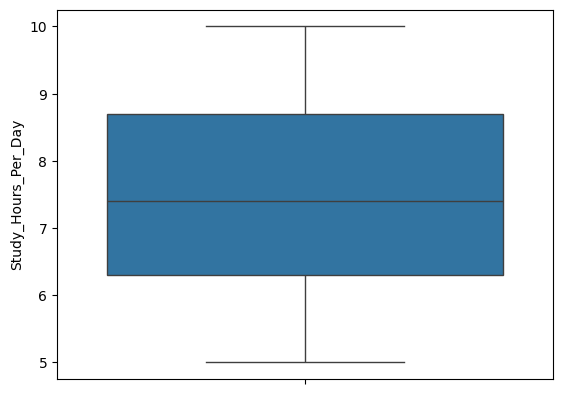

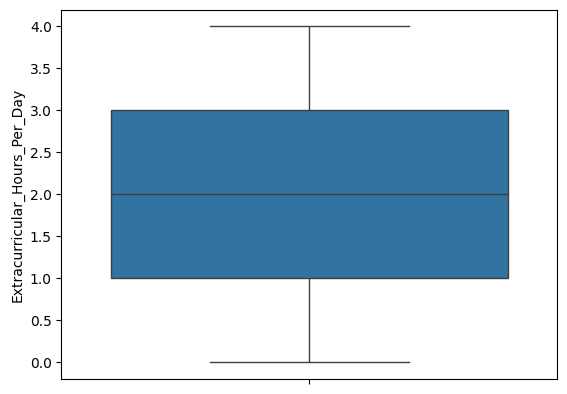

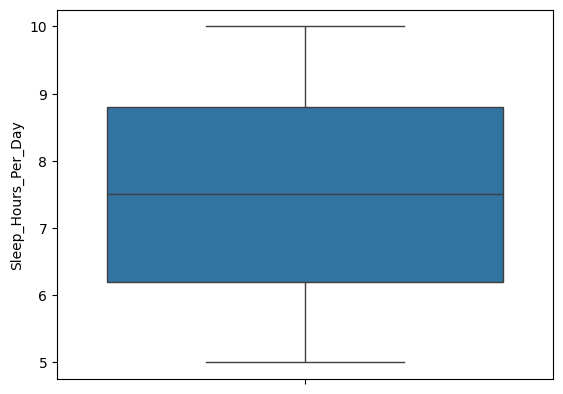

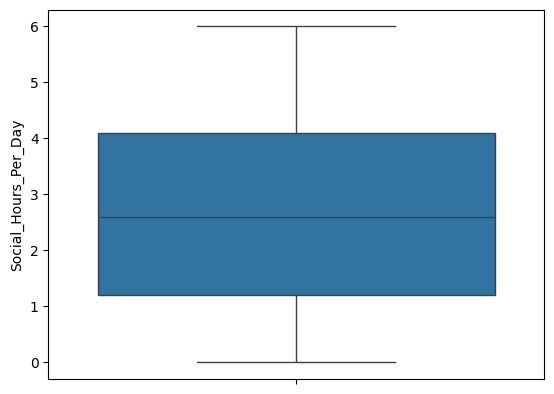

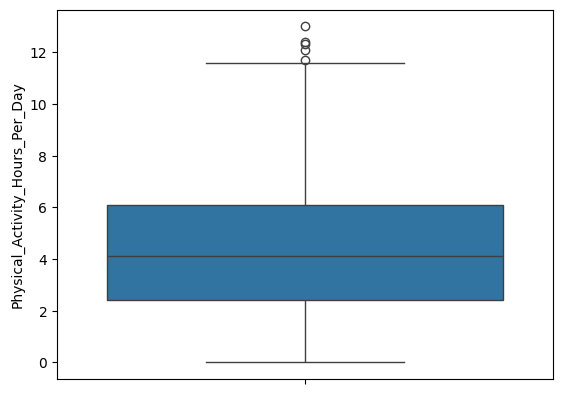

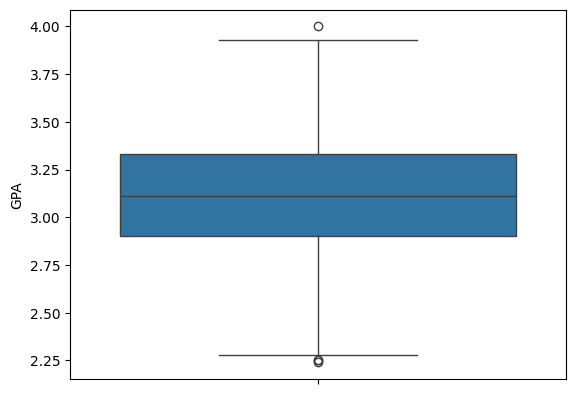

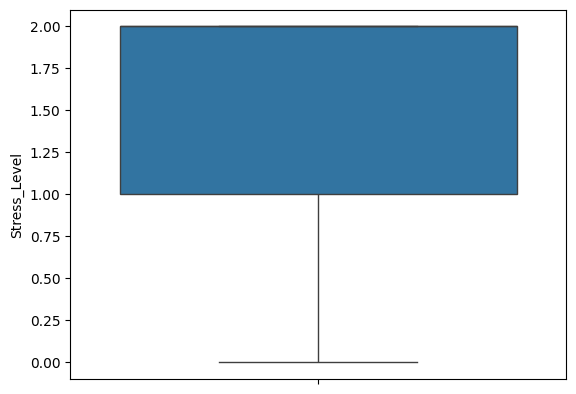

In [ ]:
# Проверим на выбросы с помощью графика "бочка с усами"
for i in df.columns:
  plt.figure()
  sns.boxplot(data=df[i])

In [ ]:
# Данных, которые считаются выбросами не много, поэтому мы заменим их на 1 и 99 квартили
for i in ['Physical_Activity_Hours_Per_Day', 'GPA']:
  # Расчет квартилей и границы
  Q1 = np.percentile(df[i], 25)
  Q3 = np.percentile(df[i], 75)
  IQR = Q3 - Q1
  limit_max = Q3 + 1.5 * IQR
  limit_min = Q1 - 1.5 * IQR
  # Замена выбросов
  df.loc[df[i] > limit_max, i] = limit_max
  df.loc[df[i] < limit_min, i] = limit_min

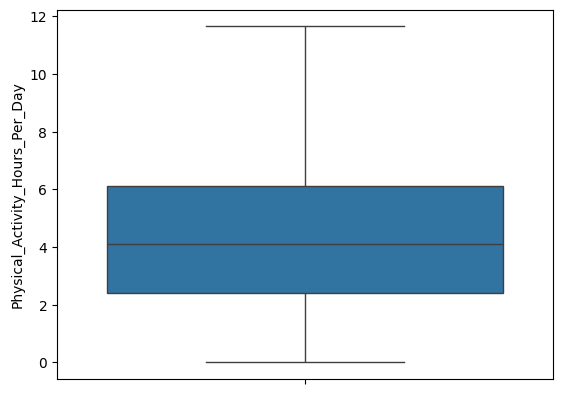

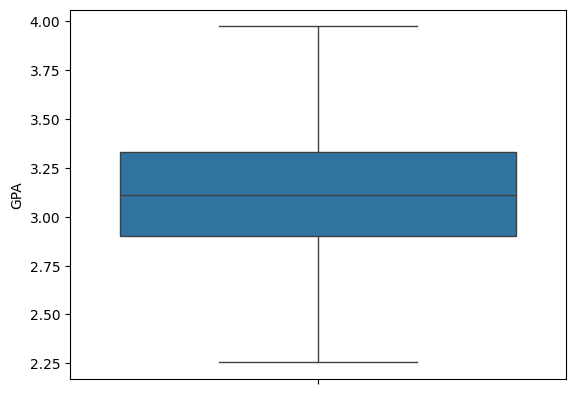

In [ ]:
# Проверим, что получилось
for i in ['Physical_Activity_Hours_Per_Day', 'GPA']:
  plt.figure()
  sns.boxplot(data=df[i])

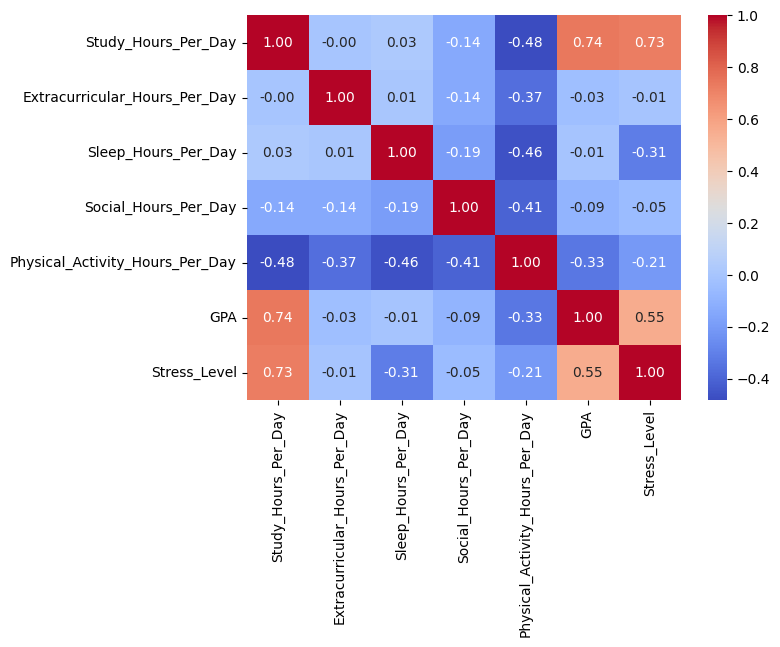

In [ ]:
# Построим матрицу корреляций
correlation_matrix = df.corr(method='spearman')
# Визуализация матрицы корреляции с помощью тепловой карты
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## Пробую регрессию

In [ ]:
# Проверим целевой признак на упорядоченность
from scipy.stats import spearmanr

# Тест Спирмена
spearman_corr, spearman_p = spearmanr(df['GPA'].index, df['GPA'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")

# Уровень значимости
alpha = 0.05

if spearman_p < alpha:
    print("Целевой признак упорядочен. Перемешиваем данные.")
    df = df.sample(frac=1).reset_index(drop=True)
else:
    print("Целевой признак не упорядочен. Перемешивание не требуется.")

Spearman correlation: -0.0037051135812399185, p-value: 0.868475923122219
Целевой признак не упорядочен. Перемешивание не требуется.


In [ ]:
# Переберём всевозможные комбинации признаков
from itertools import combinations

def combo():
  y = df['GPA']
  dict_pred = {} # Словарь для хранения списка признаков, на которых модели удовлетворяют условию

  columns = df.drop('GPA', axis=1).columns.tolist()
  # Перебираем все возможные комбинации столбцов
  for i in range(1, len(columns) + 1):  # от 1 до числа столбцов
      for combo in combinations(columns, i):
          X = df[list(combo)]
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)
          model = LinearRegression()
          model.fit(X_train, y_train)
          r2 = model.score(X_test, y_test)
          if r2 > 0.5:
            dict_pred[combo] = [r2, model] # Сохраняем коэффициент детерминации модели на обучающей и тестовой выборках
            print('Модель подходит')
          del X, X_train, X_test, y_train, y_test, model
  return dict_pred

dict_pred = combo()
dict_pred

Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит
Модель подходит


{('Study_Hours_Per_Day',): [0.5485022181081566, LinearRegression()],
 ('Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day'): [0.5474025328911261,
  LinearRegression()],
 ('Study_Hours_Per_Day', 'Sleep_Hours_Per_Day'): [0.5482467213571324,
  LinearRegression()],
 ('Study_Hours_Per_Day', 'Social_Hours_Per_Day'): [0.5490129115356296,
  LinearRegression()],
 ('Study_Hours_Per_Day',
  'Physical_Activity_Hours_Per_Day'): [0.5470909523922548, LinearRegression()],
 ('Study_Hours_Per_Day', 'Stress_Level'): [0.5480708781746951,
  LinearRegression()],
 ('Study_Hours_Per_Day',
  'Extracurricular_Hours_Per_Day',
  'Sleep_Hours_Per_Day'): [0.5469376216117455, LinearRegression()],
 ('Study_Hours_Per_Day',
  'Extracurricular_Hours_Per_Day',
  'Social_Hours_Per_Day'): [0.547716740398543, LinearRegression()],
 ('Study_Hours_Per_Day',
  'Extracurricular_Hours_Per_Day',
  'Physical_Activity_Hours_Per_Day'): [0.546822017658217, LinearRegression()],
 ('Study_Hours_Per_Day',
  'Extracurricular_Hours_Per_D

In [ ]:
# Определяем набор признаков с наилучшим показателем на тестовой выборке
best_columns = max(dict_pred, key=lambda k: dict_pred[k][0])
best_model = dict_pred[best_columns][1]
print(f"Набор признаков: {best_columns}")
print(f"Коэффициент детерминации на тестовой выборке: {dict_pred[best_columns][0]}")

Набор признаков: ('Study_Hours_Per_Day', 'Social_Hours_Per_Day')
Коэффициент детерминации на тестовой выборке: 0.5490129115356296


In [ ]:
# Коэффециенты модели
s = ""
model_zip = list(zip(best_columns, best_model.coef_))
for i in range(len(model_zip)):
  s += f"{model_zip[i][1]:0.4f}*{model_zip[i][0]} + "
s += f"{best_model.intercept_:0.4f}"
print(s)

0.1524*Study_Hours_Per_Day + 0.0023*Social_Hours_Per_Day + 1.9719


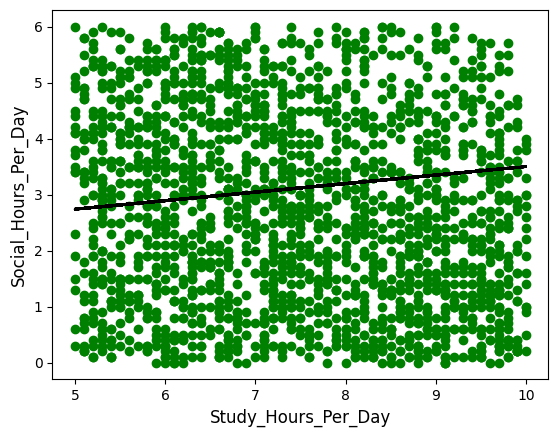

In [ ]:
# График распределения GPA
X = df['Study_Hours_Per_Day'].values
# target data is array of shape (n,)
y = df['Social_Hours_Per_Day'].values

plt.scatter(X, y,color='g')
plt.plot(X, best_model.predict(df[['Study_Hours_Per_Day', 'Social_Hours_Per_Day']]),color='k')
plt.xlabel('Study_Hours_Per_Day', size=12)
plt.ylabel('Social_Hours_Per_Day', size=12)
plt.show()

## Пробую классификацию

In [ ]:
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,1
1,5.3,3.5,8.0,4.2,3.0,2.75,0
2,5.1,3.9,9.2,1.2,4.6,2.67,0
3,6.5,2.1,7.2,1.7,6.5,2.88,1
4,8.1,0.6,6.5,2.2,6.6,3.51,2


In [ ]:
# Функция для категоризации
def categorize_grades(grade):
    if 3.0 <= grade <= 5:
        return 0 # Пусть учится
    else:
        return 1 # Отчислить

df['GPA'] = df['GPA'].apply(categorize_grades)
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,1,1
1,5.3,3.5,8.0,4.2,3.0,1,0
2,5.1,3.9,9.2,1.2,4.6,1,0
3,6.5,2.1,7.2,1.7,6.5,1,1
4,8.1,0.6,6.5,2.2,6.6,0,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('GPA', axis=1), df['GPA'], test_size=0.20, random_state=15)

In [ ]:
# Проверит распределение целевой переменной в выборках
count = df['GPA'].value_counts()

print(f"0: для обучения     - {y_train.value_counts()[0] / count[0] : 0.4f};  1: для обучения     - {y_train.value_counts()[1] / count[1] : 0.4f}")
print(f"0: для тестирования - {y_test.value_counts()[0] / count[0] : 0.4f};  1: для тестирования - {y_test.value_counts()[1] / count[1] : 0.4f}")

0: для обучения     -  0.7981;  1: для обучения     -  0.8034
0: для тестирования -  0.2019;  1: для тестирования -  0.1966


In [ ]:
# Классы распределены равномерно, продолжаем

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

print('models:', list(models.keys()))

models: ['Logistic Regression', 'Decision Tree', 'Random Forest']


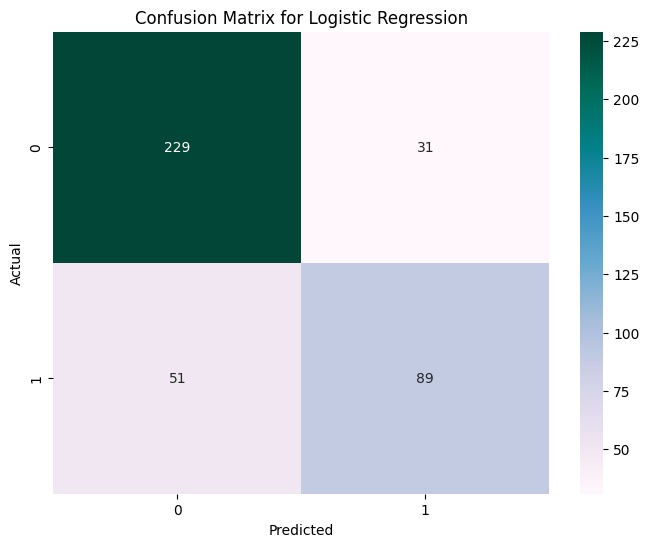


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       260
           1       0.74      0.64      0.68       140

    accuracy                           0.80       400
   macro avg       0.78      0.76      0.77       400
weighted avg       0.79      0.80      0.79       400



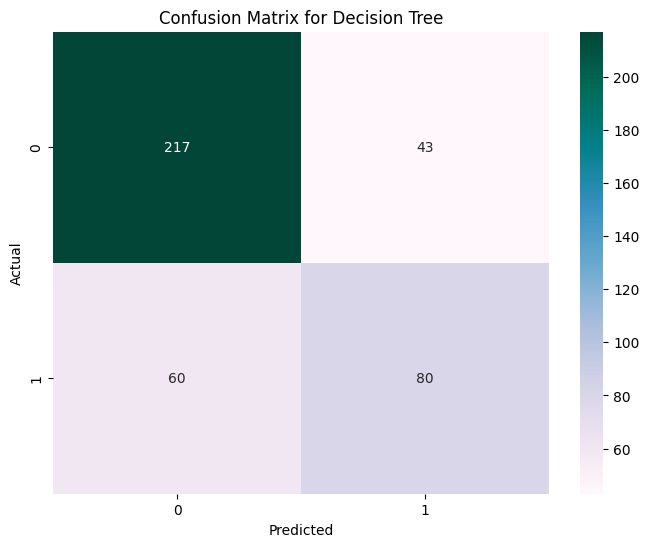


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       260
           1       0.65      0.57      0.61       140

    accuracy                           0.74       400
   macro avg       0.72      0.70      0.71       400
weighted avg       0.74      0.74      0.74       400



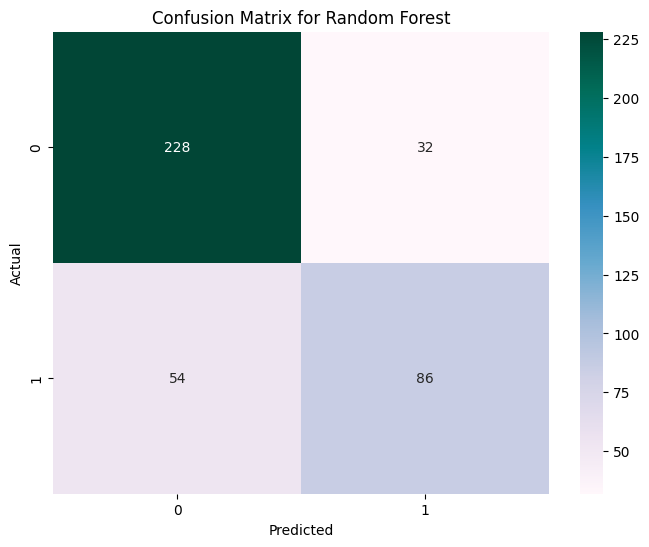


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       260
           1       0.73      0.61      0.67       140

    accuracy                           0.79       400
   macro avg       0.77      0.75      0.75       400
weighted avg       0.78      0.79      0.78       400

\Accuracy по всем моделям:



,Accuracy
Logistic Regression,0.7950
Decision Tree,0.7425
Random Forest,0.7850


In [ ]:
def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        # Обучение
        model.fit(X_train, y_train)

        # Предсказание на тестовых данных
        preds = model.predict(X_test)

        # Вычисляем Accuracy
        accuracy = accuracy_score(y_test, preds)


        results[name] = {
            'Accuracy': accuracy,
            'Predictions': preds
        }

        # Отображаем confusion matrix для тестовых данных
        conf_matrix = confusion_matrix(y_test, preds)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBuGn',
                    xticklabels=model.classes_, yticklabels=model.classes_)
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Отображаем classification report для тестовых данных
        print(f"\nClassification Report for {name}:\n")
        print(classification_report(y_test, preds))

    results_df = pd.DataFrame({
        name: {"Accuracy": results[name]["Accuracy"]}
        for name in results
    }).T

    # Accuracy по всем моделям
    print("\Accuracy по всем моделям:\n")
    return results_df

evaluation_summary = train_and_evaluate_models(models, X_train, y_train, X_test, y_test)

evaluation_summary